In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.decomposition import PCA

In [4]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [5]:
# Sum the number of Na's in each column
number_of_na_before = cust_df.isna().sum().sum()

# drop the Na's from our dataset
cust_df.dropna(inplace=True)
number_of_na_after = cust_df.isna().sum().sum()

print(f"number of Na before: {number_of_na_before}, number of Na after: {number_of_na_after}")

number of Na before: 150, number of Na after: 0


In [6]:
# Split dataset into numerical and categorical features.
X_numerical = [feature for feature in cust_df.columns if cust_df[feature].dtype != "O"]
X_categorical = [feature for feature in cust_df.columns if cust_df[feature].dtype == "O"]

# Defining the pipeline here to make the later functions shorter.
def pipeline(k):
    preprocessing = ColumnTransformer([
        ("scale", StandardScaler(), X_numerical),
        ("encode", OneHotEncoder(drop="first", sparse_output=False), X_categorical)
    ])
    return Pipeline([
        ("preprocessing", preprocessing),
        ("classifier", KMeans(n_clusters=k, n_init=12, random_state=0)),
    ])

In [7]:
# return evaluation metrics for varying values of k for our k-means algorithm.
def evaluate_k(k):
    model = pipeline(k)
    model.fit(cust_df)

    X_trans = model["preprocessing"].transform(cust_df)
    y  = model["classifier"].labels_
    return {
        "k": k,
        "inertia": model["classifier"].inertia_,
        "silhouette": metrics.silhouette_score(X_trans, y),
        "calinski_harabasz": metrics.calinski_harabasz_score(X_trans, y),
        "davies_bouldin": metrics.davies_bouldin_score(X_trans, y),
    }

results = pd.DataFrame([evaluate_k(k) for k in range(2, 50)])
results

,k,inertia,silhouette,calinski_harabasz,davies_bouldin
0,2,5551.881324,0.278094,171.624863,1.741837
1,3,4836.775552,0.195860,149.883375,1.715014
2,4,4393.862895,0.175987,133.223053,1.742474
3,5,4098.585299,0.130995,119.479415,1.801268
4,6,3827.194625,0.134519,112.056649,1.754972
5,7,3626.877795,0.135020,104.775280,1.672973
6,8,3425.973464,0.135425,100.733767,1.680878
7,9,3270.017104,0.137233,96.331810,1.658830
8,10,3179.447344,0.141044,90.123961,1.717238
9,11,3083.101539,0.129070,85.678146,1.740226


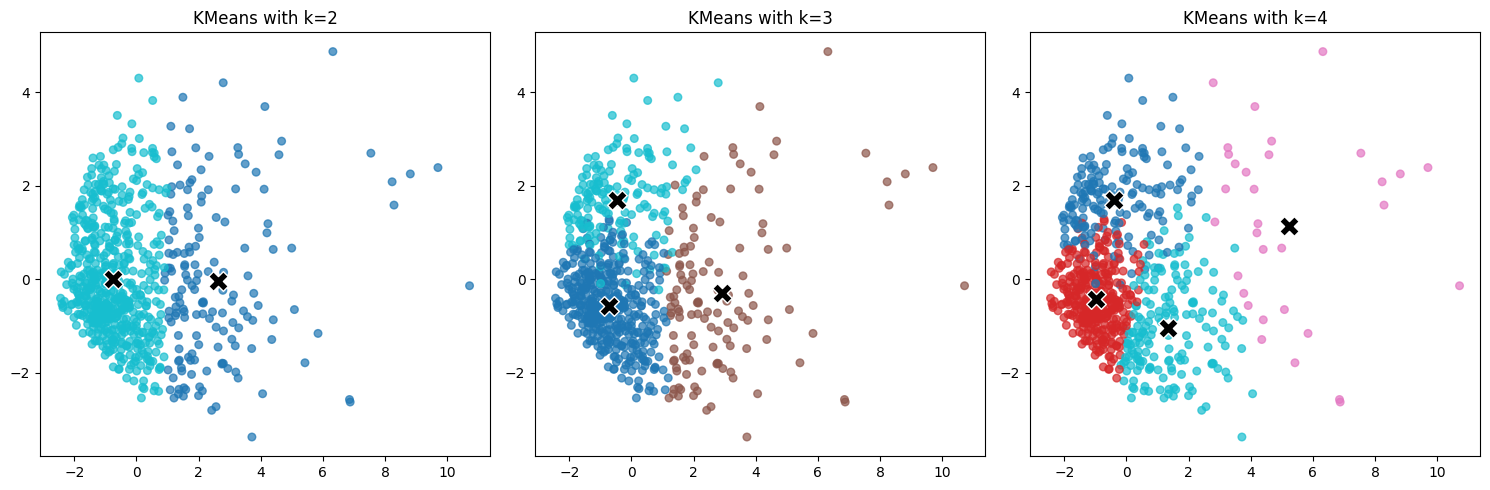

In [8]:
# It seems as though the sweet spot is around k = 2 to k = 5, giving us a high silhouette coefficient, high CH and high DB.
# Let's plot this to gain better intuition.
def plot_kmeans_clusters(k, ax):

    # Create model pipeline
    model = pipeline(k)

    # Train the clustering pipeline
    model.fit(cust_df)

    # get the transformed dataset
    X_trans = model["preprocessing"].transform(cust_df)

    # Reduce to 2D for plotting
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X_trans)

    # Apply the same transformation to the cluster centroids.
    centroids_pca = pca.transform(model["classifier"].cluster_centers_)
    labels = model["classifier"].labels_

    # Plot data points
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10",s=30, alpha=0.7)

    # Plot centroids
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, edgecolor='white', c="black")

    # Title
    ax.set_title(f"KMeans with k={k}")

# Side-by-side plots for k=2,3,4
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for k, ax, in zip(range(2, 5), axes):
    plot_kmeans_clusters(k, ax)

plt.tight_layout()
plt.show()

# It looks like k = 3, or k = 4 is the ideal number of k, giving us a good mix of the evaluation metrics.